In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.model_selection import KFold
from sklearn import svm, datasets
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
fem=pd.read_csv('./data/z_complete/fem.csv')
man=pd.read_csv('./data/z_complete/men.csv')

In [3]:
df=pd.concat([fem,man])
df.shape

(12890, 3)

In [4]:
df = shuffle(df)
#df=df.sample(frac = 0.5)

In [5]:
df.head(2)

,subreddit,created_utc,text
8116,Feminism,1615625952,At my university there were some vegans that a...
3379,Feminism,1615797935,I think this thread sums it up Stereotypes and...


In [6]:
df['subreddit'] = np.where(df['subreddit'] == 'MensRights', 1, 0)

In [7]:
df.drop(columns='created_utc', inplace=True)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cvec = CountVectorizer(stop_words='english')
#Add the stop words so that we can get some actual idea of the most prevelent words
X = df.text
y= df.subreddit
cvec.fit(X)
text_cv = cvec.transform(df.text)
#Transform
text_df = pd.DataFrame(text_cv.toarray(), columns=cvec.get_feature_names())
text_df

,aacknowledged,aback,abandon,abandoned,abandoning,abbreviation,abby,abc,abdicating,abdication,...,zombies,zone,zoned,zones,zoning,zoo,zoologist,zoom,zora,zygomatic
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12885,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
text_df.subreddit.value_counts()

0    12546
1      324
2       20
Name: subreddit, dtype: int64

In [10]:
y.value_counts()

0    8550
1    4340
Name: subreddit, dtype: int64

In [11]:
X = text_df.drop(columns=['subreddit'])
stan = StandardScaler()
X_stan = stan.fit_transform(X)

In [12]:
X, y = X_stan, y

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X_stan,
    y,
    test_size=0.33,
    random_state=42
)

In [14]:
svc = SVC(C= 0.4737368421052632, kernel='linear', degree=2, gamma='scale')

In [15]:
svc.fit(X_train, y_train)

SVC(C=0.4737368421052632, degree=2, kernel='linear')

In [16]:
y_pred = svc.predict(X_test)

In [17]:
print(accuracy_score(y_test, y_pred))

0.917724494593324


In [18]:
print(svc.score(X_test, y_test))

0.917724494593324


In [19]:
report=classification_report(y_test,y_pred, output_dict=True)
report

{'0': {'precision': 0.9157645466847091,
  'recall': 0.9640313390313391,
  'f1-score': 0.9392782789729355,
  'support': 2808},
 '1': {'precision': 0.9221879815100154,
  'recall': 0.8278008298755186,
  'f1-score': 0.8724489795918368,
  'support': 1446},
 'accuracy': 0.917724494593324,
 'macro avg': {'precision': 0.9189762640973622,
  'recall': 0.8959160844534289,
  'f1-score': 0.9058636292823861,
  'support': 4254},
 'weighted avg': {'precision': 0.9179479709342138,
  'recall': 0.917724494593324,
  'f1-score': 0.9165619726952984,
  'support': 4254}}

In [20]:
shemegel = pd.DataFrame(report).transpose()
shemegel

,precision,recall,f1-score,support
0,0.915765,0.964031,0.939278,2808.000000
1,0.922188,0.827801,0.872449,1446.000000
accuracy,0.917724,0.917724,0.917724,0.917724
macro avg,0.918976,0.895916,0.905864,4254.000000
weighted avg,0.917948,0.917724,0.916562,4254.000000


In [21]:
cm = confusion_matrix(y_test, y_pred)


In [22]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()


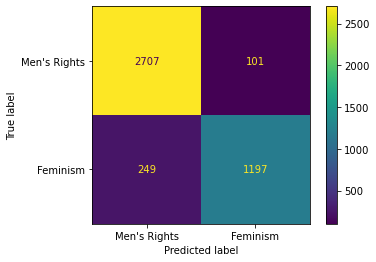

In [23]:
disp = ConfusionMatrixDisplay(cm, display_labels=["Men's Rights",'Feminism'])

disp.plot();